# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mrg_df = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
mrg_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
miceC = len(mrg_df["Mouse ID"].unique())
print(miceC)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupRow = mrg_df[mrg_df.duplicated(["Mouse ID", "Timepoint"],keep=False)]
dupVal = dupRow["Mouse ID"].unique()
dupVal

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupRow

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#get inffo on mrg_df
mrg_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mrg_df.loc[mrg_df["Mouse ID"] != dupVal[0],:] #drop Mouse ID = "g989"
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

byDrug_df = clean_df.set_index("Drug Regimen")
drugMean = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drugMedi = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drugVari = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drugStde = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drugStEr = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# print(f"Mean = {drugMean}")
# print(f"Median = {drugMedi}")
# print(f"Variance = {drugVari}")
# print(f"Standard Deviation = {drugStde}")
# print(f"Standard Erro = {drugStEr}")
drugMean.name = "Mean Tumor Volume"
drugMedi.name = "Median Tumor Volume"
drugVari.name = "Tumor Volume Variance"
drugStde.name = "Tumor Volume Std. Dev."
drugStEr.name = "Tumor Volume Std. Err."

summ_df = pd.merge(drugMean,drugMedi,on="Drug Regimen")
summ_df = pd.merge(summ_df,drugVari,on="Drug Regimen")
summ_df = pd.merge(summ_df,drugStde,on="Drug Regimen")
summ_df["Tumor Volume Std. Err."] = drugStEr
summ_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summ_stat_df = byDrug_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summ_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

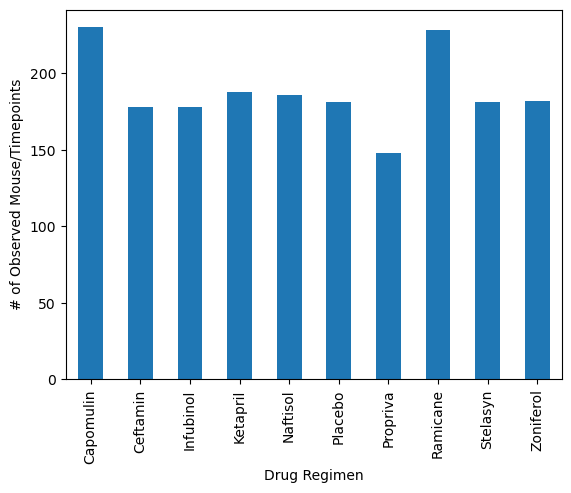

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#print(clean_df["Drug Regimen"].unique())
#print(clean_df.groupby("Drug Regimen")["Mouse ID"].count())

clean_df.groupby("Drug Regimen")["Mouse ID"].count().plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse/Timepoints")
plt.show()

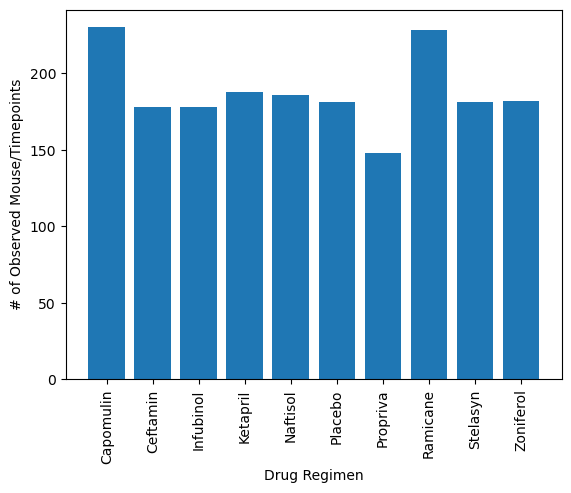

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_df.groupby("Drug Regimen")["Mouse ID"].count().sort_index()
drugList = y_axis.index
x_axis = np.arange(len(drugList))
# print(drugList)
# print(x_axis)
# print(y_axis)
tickLoc = [val for val in x_axis]
plt.xticks(tickLoc,drugList)
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse/Timepoints")
plt.show()

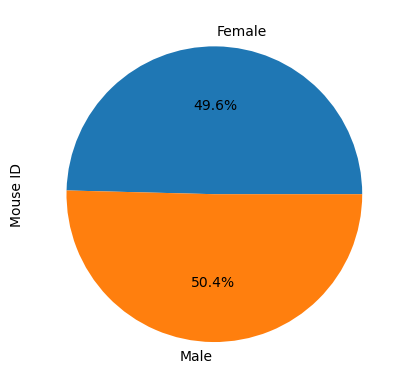

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mf_df = clean_df.drop_duplicates("Mouse ID")
mf_df = mf_df.groupby("Sex")
mf_df = mf_df["Mouse ID"]
mf_df.count()

# Make the pie chart
mf_df.count().plot(kind="pie",autopct="%1.1f%%")
plt.show()

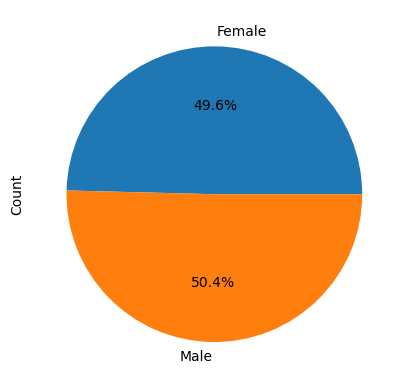

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mf_df = clean_df.drop_duplicates("Mouse ID")
mf_df = mf_df.groupby("Sex")
mf_df = mf_df["Mouse ID"]
res = mf_df.count()
resIndex = res.index
# Make the pie chart
plt.pie(res,autopct="%1.1f%%",labels=resIndex)
plt.ylabel("Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourD_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse
fourD_df = fourD_df[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
maxTime = fourD_df.groupby("Mouse ID")["Timepoint"].max()
maxTime.name = "Max Timepoint"
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
fourD_df = pd.merge(fourD_df,maxTime,on="Mouse ID")
fourD_df = fourD_df.loc[fourD_df["Timepoint"] == fourD_df["Max Timepoint"],:]
fourD_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Max Timepoint
52,u153,0,Ceftamin,45.000000,0
64,b447,0,Ceftamin,45.000000,0
68,x226,0,Ceftamin,45.000000,0
73,t573,0,Ceftamin,45.000000,0
154,c326,5,Infubinol,36.321346,5
...,...,...,...,...,...
809,a644,45,Ramicane,32.978522,45
810,i177,45,Ramicane,33.562402,45
811,r944,45,Capomulin,41.581521,45
812,u364,45,Capomulin,31.023923,45


In [46]:
treatList = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = [[],[],[],[]]
i = 0
for treat in treatList:
    currDrug = fourD_df.loc[fourD_df["Drug Regimen"] == treat,:]
    tumorVol[i].extend(currDrug["Tumor Volume (mm3)"])
    print(currDrug)
    i += 1

    Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)  Max Timepoint
265     w150         10    Capomulin           39.952347             10
335     r157         15    Capomulin           46.539206             15
379     f966         20    Capomulin           30.485985             20
632     j246         35    Capomulin           38.753265             35
752     b128         45    Capomulin           38.982878             45
756     t565         45    Capomulin           34.455298             45
757     l509         45    Capomulin           41.483008             45
761     g288         45    Capomulin           37.074024             45
767     r554         45    Capomulin           32.377357             45
770     g316         45    Capomulin           40.159220             45
773     y793         45    Capomulin           31.896238             45
775     m957         45    Capomulin           33.329098             45
783     l897         45    Capomulin           38.846876        

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatList = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = [[],[],[],[]]
# getting Tumor Volume for each of the four drugs into its respective tumorVol[i]
i = 0
for treat in treatList:
    currDrug = fourD_df.loc[fourD_df["Drug Regimen"] == treat,:]
    tumorVol[i].extend(currDrug["Tumor Volume (mm3)"])
    i += 1
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
j = 0
for data in tumorVol:
    dataV = pd.Series(data)
    quartiles = dataV.quantile([.25,.5,.75])
    lowQ = quartiles[0.25]
    uppQ = quartiles[0.75]
    iqr = uppQ - lowQ
    lowB = lowQ - 1.5*iqr
    uppB = uppQ + 1.5*iqr
    #print(f"{treatList[j]};lowQ:{lowQ};uppQ:{uppQ};IQR:{iqr};lowB:{lowB};uppB:{uppB}")
    out = []
    out.append(dataV.loc[(dataV > uppB) | (dataV < lowB)])
    #print(f"{treatList[j]}; lowQ:{lowQ}; uppQ:{uppQ}; IQR:{iqr}; lowB:{lowB}; uppB:{uppB}")
    print(f"{treatList[j]}; outlier:{out}")
    j += 1



Capomulin; outlier:[Series([], dtype: float64)]
Ramicane; outlier:[Series([], dtype: float64)]
Infubinol; outlier:[0    36.321346
dtype: float64]
Ceftamin; outlier:[Series([], dtype: float64)]


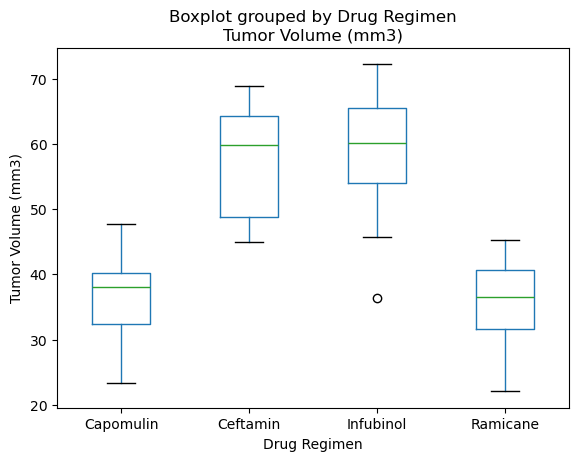

In [70]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fourD_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha=0)

## Line and Scatter Plots

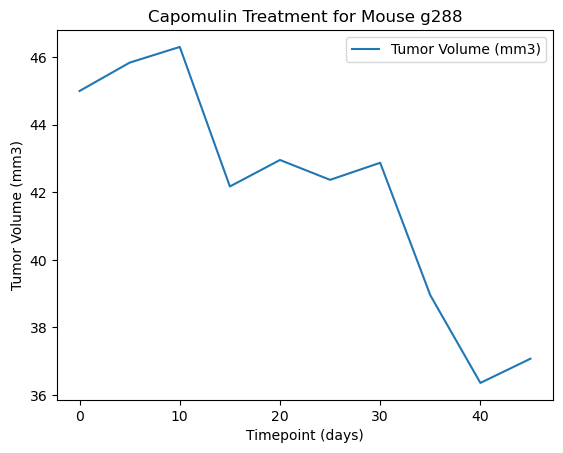

In [81]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capData = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "g288"),:]
capData = capData[["Timepoint","Tumor Volume (mm3)"]]
#print(capData)
capData.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment for Mouse g288")
plt.show()

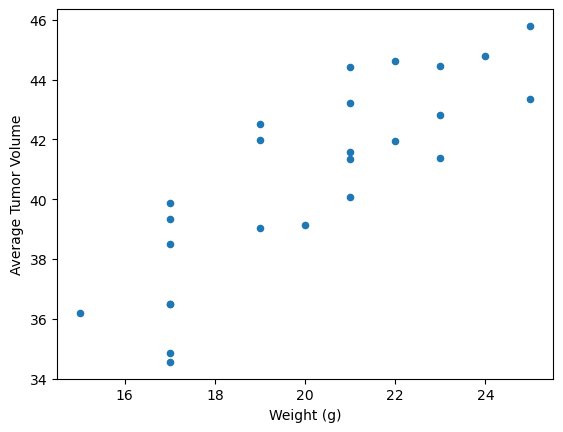

In [127]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capData = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avgMouseT = capData.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capData = capData[["Mouse ID","Weight (g)"]]
capData = capData.drop_duplicates("Mouse ID")
capData = pd.merge(capData,avgMouseT,on="Mouse ID")
capData.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)",xlabel="Weight (g)", ylabel= "Average Tumor Volume")
plt.show()

## Correlation and Regression

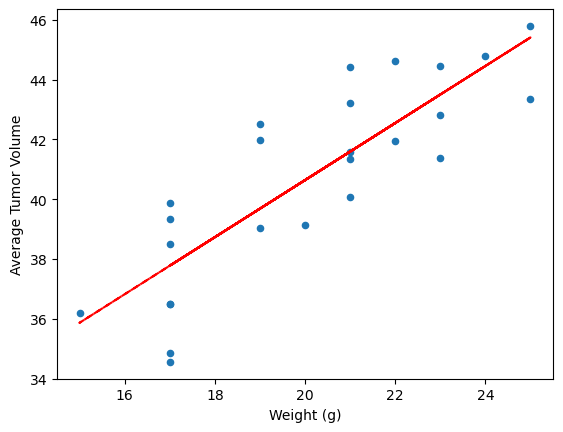

In [131]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capData = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
avgMouseT = capData.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capData = capData[["Mouse ID","Weight (g)"]]
capData = capData.drop_duplicates("Mouse ID")
capData = pd.merge(capData,avgMouseT,on="Mouse ID")
m,b,rval,pval,stderr = st.linregress(capData["Weight (g)"],capData["Tumor Volume (mm3)"])
fitL = m*capData["Weight (g)"]+b
capData.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)",xlabel="Weight (g)", ylabel= "Average Tumor Volume")
plt.plot(capData["Weight (g)"],fitL,"--",color='red')
plt.show()